In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = tf.image.resize(train_images[..., tf.newaxis], (48, 48)) / 255.0
test_images = tf.image.resize(test_images[..., tf.newaxis], (48, 48)) / 255.0

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
train_images = tf.concat([train_images] * 3, axis=-1)
test_images = tf.concat([test_images] * 3, axis=-1)

In [4]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

58889256/58889256 [==============================] - 3s 0us/step


In [6]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 25s 23ms/step - loss: 0.8891 - accuracy: 0.7422 - val_loss: 0.5707 - val_accuracy: 0.8077
Epoch 2/10
938/938 [==============================] - 22s 24ms/step - loss: 0.5044 - accuracy: 0.8252 - val_loss: 0.4880 - val_accuracy: 0.8261
Epoch 3/10
938/938 [==============================] - 20s 21ms/step - loss: 0.4491 - accuracy: 0.8414 - val_loss: 0.4496 - val_accuracy: 0.8394
Epoch 4/10
938/938 [==============================] - 23s 24ms/step - loss: 0.4192 - accuracy: 0.8505 - val_loss: 0.4289 - val_accuracy: 0.8479
Epoch 5/10
938/938 [==============================] - 23s 25ms/step - loss: 0.3993 - accuracy: 0.8568 - val_loss: 0.4142 - val_accuracy: 0.8521
Epoch 6/10
938/938 [==============================] - 23s 24ms/step - loss: 0.3854 - accuracy: 0.8618 - val_loss: 0.4087 - val_accuracy: 0.8541
Epoch 7/10
938/938 [==============================] - 20s 21ms/step - loss: 0.3738 - accuracy: 0.8661 - val_loss: 0.3967 - val_accuracy:

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 4s 12ms/step - loss: 0.3830 - accuracy: 0.8635
Test accuracy: 0.8634999990463257


In [8]:
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1)
true_labels = tf.argmax(test_labels, axis=1)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

313/313 [==============================] - 4s 11ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1000
           1       0.97      0.97      0.97      1000
           2       0.81      0.78      0.80      1000
           3       0.85      0.84      0.85      1000
           4       0.74      0.80      0.77      1000
           5       0.96      0.93      0.95      1000
           6       0.63      0.65      0.64      1000
           7       0.91      0.96      0.93      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



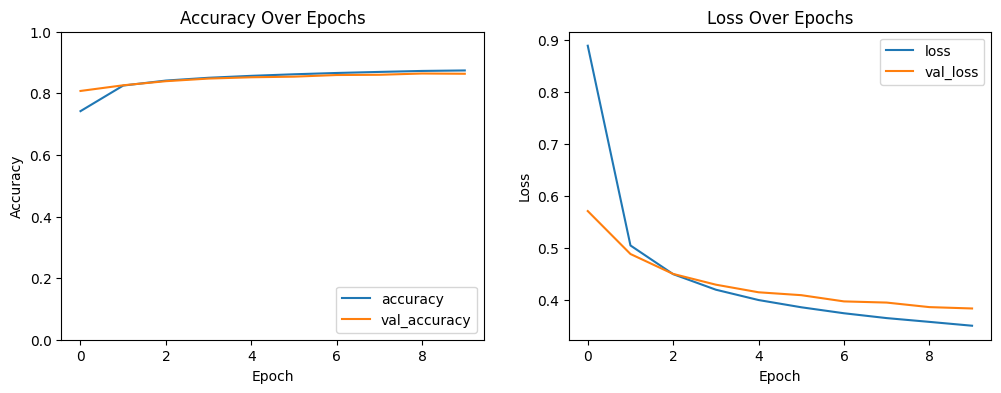

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss Over Epochs')

plt.show()

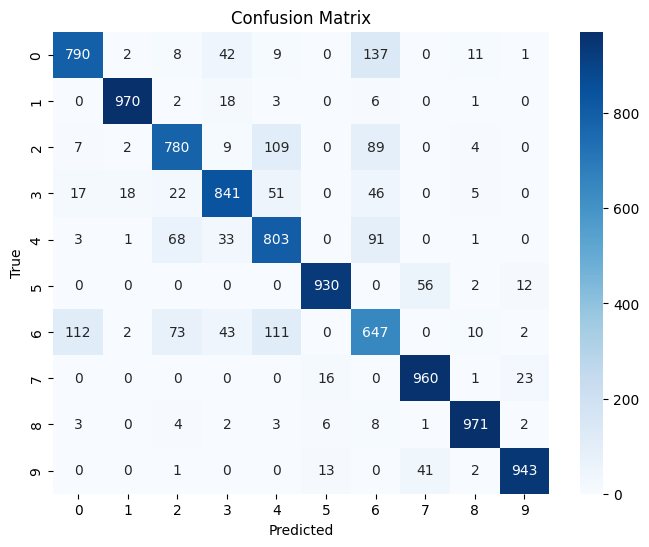

In [10]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()